# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

*** Note for intuition: if
$A = \begin{pmatrix}
a && b \\ c && d \end{pmatrix}$, then 
$\mathrm{vec}(A) = \begin{pmatrix} a \\ c \\ b \\ d \end{pmatrix}$.


##### Let's prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$
$AXB = \begin{pmatrix}
AXB_{11} && {AXB}_{12} && ... && {AXB}_{1n}\\
AXB_{21} && {AXB}_{22} && ... && {AXB}_{2n}\\
... && ... && ... && ...\\
AXB_{m1} && {AXB}_{m2} && ... && {AXB}_{mn}\\
\end{pmatrix} = 
\begin{pmatrix}
AXB_1 && AXB_2 && ... && AXB_n
\end{pmatrix}
\in \mathbb{R}^{m \times n}$
##### Then, according to the definition of $\mathrm{vec}$,
$\mathrm{vec}(AXB) = \begin{pmatrix}
AXB_1 \\ AXB_2 \\ ... \\ AXB_n
\end{pmatrix}$
##### Let's introduce matrices' shapes as, according to $AXB \in \mathbb{R}^{m \times n}$:
##### $A \in \mathbb{R}^{m \times p}, X \in \mathbb{R}^{p \times q}, B \in \mathbb{R}^{q \times n}$ and let's use for any of these matrices such notation:
##### $M = \begin{pmatrix} M_1 && M_2 && ... && M_n \end{pmatrix}$, $M_i$ - $i$-th column of $M$ of length $shape(M)[0]$.

##### Using associative property of matrices, for $i$-th column of $AXB$ we get:
$AXB_{i} = A(XB)_i = A(\sum\limits_{j = 1}^{p} \sum\limits_{k = 1}^{q}X_{j,k} B_{k,i}) = \begin{pmatrix} B_{1,i}A & B_{2,i}A & \dots & B_{q,i}A \end{pmatrix} \begin{pmatrix}X_1\\ X_2 \\ \dots\\ X_q \\ \end{pmatrix} =
(B_i^T \otimes A) \begin{pmatrix} X_1 \\ X_2 \\ ... \\ X_q \end{pmatrix} = (B_i^T \otimes A)\ \mathrm{vec}(X)$
##### Now do it for all columns of $AXB$, vectorize it and get:
$\mathrm{vec}(AXB) = \begin{pmatrix} B_1^T \otimes A \\ B_2^T \otimes A \\ ... \\ B_n^T \otimes A \end{pmatrix} \begin{pmatrix} X_1 \\ X_2 \\ ... \\ X_q \end{pmatrix} = (B^T \otimes A)\ \mathrm{vec}(X)$.

##### If the reshape is rowwise instead of columnwise, then (denote $\mathrm{row}(X) = \mathrm{vec}^T(X)$):
$\mathrm{row}(AXB) = \mathrm{vec}^T((AXB)^T) = \mathrm{vec}^T(B^T X^T A^T) = (\mathrm{vec}(B^T X^T A^T))^T = ((A \otimes B^T) \mathrm{vec}(X^T))^T = \mathrm{row}(X) (A^T \otimes B)$

------------------------------------------------------


- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

##### The naive computation of the Kroneker product of two matrices $A \in \mathbb{R}^{m \times n}, B \in \mathbb{R}^{p \times q}$ requires time $O(mnpq)$ (it follows right from the definition - we have to multiple each element of $A$ to each element of $B$).
##### For simplicity let us consider two matrices $A, B \in \mathbb{R}^{n \times n}$. The their Kroneker product is  a matrix $A \otimes B \in \mathbb{R}^{n^2 \times n^2}$ and the time complexity  of a naive computation of  $(A \otimes B) x$ is $O(n^4)$ (from the previous). 
##### It can be reduced to $O(n^3)$ by using what we proved above. If $(A \otimes B)$ is multiplied to $x$ then $x$ has the shape $(n^2, 1)$. Then we can rearrange it to matrice $n \times n$ and use the formula above. And that's how we can just count (twice) the matrix product of matrices $n \times n$ and then reshape it correspondingly to the size of $x$ (vectorize). Its naive computation takes $O(n^3)$ time.

-------------------------------------------


- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.
#### We'll use the following properties:
* the mixed-product property of Kroneker product:
$(A\otimes B)(C\otimes D) = (AC) \otimes (BD)$
* bilinear property:
$A \otimes (B + C) = A \otimes B + A \otimes C$
##### Let $A, B \in \mathbb{R}^{n \times n}$,
##### $Ax = \lambda x, By = \theta y$, $\lambda$ and $\theta$ are eigenvelues of matrices $A$ and $B$, correspondingly. Notice that:
$(A\otimes I + I \otimes B)(x \otimes y) = (Ax) \otimes (Iy) + (Ix) \otimes (By) = (\lambda x) \otimes (Iy) + (Ix) \otimes (\theta y)= (\lambda x) \otimes y + x \otimes (\theta y) = \lambda (x \otimes y) + \theta (x \otimes y) = (\lambda + \theta) (x \otimes y)$
##### So, we got that for matrix $A\otimes I + I \otimes B \in \mathbb{R}^{n^2 \times n^2}$ there are $n^2$ eigenvalues of form 
$\sigma_k = \lambda_i + \theta_j,\ i, j \in \{1, .. n\}, k \in \{1, .. n^2\}$ 
##### and the corresponding eigenvectors are 
$h_k = x_i + y_j, \ i, j \in \{1, .. n\}, k \in \{1, .. n^2\}$. 
##### We can also notice that matrix $n^2 \times n^2$ cannot have other eigenvalues, since we explicitly enumerated the maximum number of them ($n^2$).

-------------------------------------------

- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).




* Richardson iteration for $Ax = f$:

$x_{k+1} = x_k - \tau(Ax_k - f)$

##### If we introduce $e_k = x_k - x*$ as an error at $k$-th iteration, then we can write:
$\| e_{k+1} \|_2 \leq q\|e_k\|_2 \rightarrow \| e_{k+1} \|_2 \leq q^k\|e_0\|_2 \rightarrow ln(\dfrac{\| e_{k+1} \|_2 }{\| e_{0} \|_2 }) \leq k ln(q) \rightarrow k \geq \dfrac{ln(\dfrac{\| e_{k+1} \|_2 }{\| e_{0} \|_2 })}{ln(q)} \rightarrow k \geq log_q(\dfrac{\|e_{k+1}\|}{\|e_0\|}) = log_q(10^{-4})$
##### The last equation follows from that $\dfrac{e_{k+1}}{e_0}$ is relative accuracy that's equal to $10^{-4}$
##### For Richardson iteration with the optimal choice of parameter we get:
$q = \dfrac{cond(A) - 1}{cond(A) + 1}, cond(A) = \dfrac{\lambda_{max}}{\lambda_{min}}$

##### In our case $q = \dfrac{10^6 - 1}{10^6 + 1} \rightarrow k \geq log_q{10^{-4}} \approx 4.61 \cdot 10^6 = 4610000$

* Chebyshev iteration (use $2$-norm)
##### For Chebyshev iteration we have $ \| e_{k+1} \|_2 \leq C q^k\|e_0\|_2$, where $q = \dfrac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1}$ and after applying the same transformations, we get:
$k \geq log_q(\dfrac{\|e_{k+1}\|}{C \|e_0\|})= log_q(\dfrac{\|e_{k+1}\|}{\|e_0\|}) - log_q C = log_q(10^{-4}) - log_q C, q = \dfrac{10^3 - 1}{10^3 + 1}$
##### Let's take $C = 1$ as the worst case to get approximate result:
$k \geq log_q(10^{-4}) - log_q C \approx 4952 \approx 5000$
* Conjugate gradient method (use $A$-norm).
##### For conjugate gradient method we have:
$\| e_{k+1} \|_A \leq \gamma q^k\|e_0\|_A,$
##### where $q$ is the same as for Chebushev iteration, therefore, we get (if take $\gamma = C = 1$ to look at the worst case):
$k \geq log_q(10^{-4}) - log_q \gamma \approx 5000$

    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

##### Let's take the functions from the seminar in order to check the convergence of these three methods.

In [508]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg as spla
import scipy
from scipy.sparse import csc_matrix

In [510]:
n = 1001
rhs = np.random.randn(n)
x0 = np.zeros(n) #np.random.randn(n)

a = [(i+1) / 1000 for i in range(1000)]
a.append(1000)
d = jnp.array(a)
A = sp.sparse.spdiags(d, [0], n, n, 'csr') #
#A_ = jnp.diag(d)
eigvals = [0.001, 1000] #np.linalg.eigvalsh(A_)

rhs = np.random.rand(n)
niters = 4610000
tau_opt = 2. / (min(eigvals) + max(eigvals))

In [12]:
def richardson(A, b, tau, x0, tol, max_iter):
    x = x0.copy()
    conv = []
    for i in range(max_iter):
        x = x - tau * (A @ x - b)
        conv.append(np.linalg.norm(A @ x - b))
        #if np.linalg.norm(A @ x - b) < tol:
        #    break
    return x, conv

x_rich, conv_rich = richardson(A, rhs, tau_opt, x0, 1e-6, niters)
print(np.linalg.norm(A @ x_rich - rhs))

5.582846672410565e-05


In [13]:
print("Relative error for Richardson:", np.linalg.norm(A @ x_rich - rhs) / np.linalg.norm(A @ x0 - rhs))

Relative error for Richardson: 3.066492752481472e-06


##### As we can see, the relative error for almost minimal number of iterations ($4610000$, that we found theoretically) is lower than the required error $10^{-4}$, though not very much.

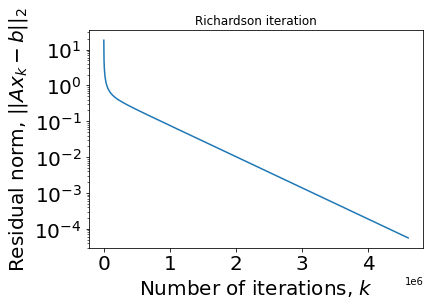

In [14]:
fig, ax = plt.subplots()
plt.close(fig)

plt.semilogy(conv_rich)
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("Residual norm, $||Ax_k - b||_2$", fontsize=20)
plt.title("Richardson iteration")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [511]:
import scipy.sparse.linalg as spsplin

conv_cg = []

def cl_cg(x):
    conv_cg.append(x.copy())
    
x_cg, info = spsplin.cg(A, rhs, callback=cl_cg, maxiter = 5000, x0=x0)

In [512]:
print(np.linalg.norm(A @ x_cg - rhs))
print('Relative error for CG:', np.linalg.norm(A @ x_cg - rhs) / np.linalg.norm(A @ x0 - rhs))

0.00017033437476714365
Relative error for CG: 9.310577385559502e-06


In [513]:
niters = 5500
roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]
lam_max = max(eigvals)
lam_min = min(eigvals)
taus = [(lam_max + lam_min - (lam_min - lam_max) * r) / 2 for r in roots]
x = x0
r = A.dot(x) - rhs
res_cheb = [np.linalg.norm(r)]

def good_shuffle(idx):
    if len(idx) == 1:
        return idx
    else:
        new_len = int(np.ceil((len(idx) / 2)))
        new_idx = good_shuffle(idx[:new_len])
        res_perm = []
        perm_count = 0
        for i in new_idx:
            res_perm.append(i)
            perm_count += 1
            if perm_count == len(idx):
                break
            res_perm.append(len(idx) + 1 - i)
            perm_count += 1
            if perm_count == len(idx):
                break
        return res_perm

good_perm = good_shuffle([i for i in range(1, niters+1)])
# good_perm = [i for i in range(niters, 0, -1)]
# good_perm = [i for i in range(niters)]
# good_perm = np.random.permutation([i for i in range(1, niters+1)])

for i in range(niters):
    x = x - 1.0/taus[good_perm[i] - 1] * r
    r = A.dot(x) - rhs
    res_cheb.append(np.linalg.norm(r))

In [514]:
print("Relative error for Chebyshev:", res_cheb[5500] / res_cheb[0])

Relative error for Chebyshev: 9.249765097891431e-05


##### For this method we took a bit more iterations (5500 instead of 5000), but got good result.

Text(0, 0.5, '$||Ax_k - b||_2$')

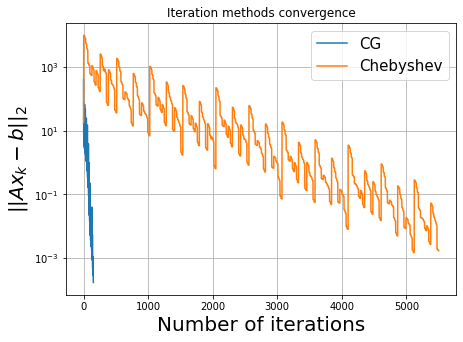

In [520]:
plt.figure(figsize=(7, 5))
plt.semilogy([np.linalg.norm(A @ x - rhs) for x in conv_cg], label="CG")
#plt.semilogy(conv_rich, label="Richardson")
plt.semilogy(res_cheb, label="Chebyshev")
plt.title("Iteration methods convergence")
plt.legend(fontsize=15, loc='best')
plt.grid(True)
plt.xlabel("Number of iterations", fontsize=20)
plt.ylabel("$||Ax_k - b||_2$", fontsize=20)

##### We checked experimentally the convergence of all 3 iterative methods for a given number or iterations. The plots for Richardson method and for other two are different because the number of iterations for them is too different and it wouldn't have much sense to compare them.

### Problem 2 (40 pts)

### Spectral graph partitioning and inverse iteration


Given connected graph $G$ and its corresponding graph Laplacian matrix $L = D - A$ with eigenvalues $0=\lambda_1, \lambda_2, ..., \lambda_n$, where $D$ is its degree matrix and $A$ is its adjacency matrix, *Fiedler vector* is an eignevector correspondng to the second smallest eigenvalue $\lambda_2$ of $L$. Fiedler vector can be used for graph partitioning: positive values correspond to the one part of a graph and negative values to another.

### Inverse power method (15 pts)

To find the Fiedler vector we will use the inverse iteration with adaptive shifts (Rayleigh quotient iteration). 

* (5 pts) Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection.


* Matrix $Q$ is an orthoprojection iff $Q^2 = Q, Q^* = Q$

##### $D$ is a diagonal matrix and for $A$ the sum of elements for each row is equal to the degree of corresponding vertex (with the number equal to the number of row). Therefore, when we take $D - A$, we get such a matrix that for each row the sum of elements is equal to $0$. Therefore, for eigenvalue, equal to $0$, we find eigenvector:
$v_0 = (1, 1, ..., 1)^T$
##### Normalize it:
$v_0 = (\dfrac{1}{\sqrt{n}}, \dfrac{1}{\sqrt{n}}, ..., \dfrac{1}{\sqrt{n}})^T.$

##### To find projection of vector $x$ on subspace orthogonal to $v_0$, we need to substract projection of $x$ on $v_0$ from $x$:
$x_p = x - v_0 v_0^Tx$
##### Therefore projection matrix:
$P = I - v_0 v_0^T$
    
##### And now, first, find the projection matrix $Q$ onto $v_0$:
$Q = \dfrac{[v_0, v_0]}{\|v_0\|} = \begin{pmatrix}
\dfrac{1}{n} && \dfrac{1}{n} && ... && \dfrac{1}{n} \\
\dfrac{1}{n} && \dfrac{1}{n} && ... && \dfrac{1}{n} \\
... && ... && ... && ... \\
\dfrac{1}{n} && \dfrac{1}{n} && ... && \dfrac{1}{n} \\
\end{pmatrix}$

##### One can check that for this matrix $Q^2 = Q$ and $Q^* = Q$. Therefore, this matrix is orthoprojection.
##### Now, let's find the required matrix $P$:
$P = I - Q = I -\dfrac{[v_0, v_0]}{\|v_0\|} =  \begin{pmatrix}
\dfrac{n-1}{n} && -\dfrac{1}{n} && ... && -\dfrac{1}{n} \\
-\dfrac{1}{n} && \dfrac{n-1}{n} && ... && -\dfrac{1}{n} \\
... && ... && ... && ... \\
-\dfrac{1}{n} && -\dfrac{1}{n} && ... && \dfrac{n-1}{n} \\
\end{pmatrix}_{n \times n} = \dfrac{1}{n} \begin{pmatrix}
n-1 && -1 && ... && -1 \\
-1 && n-1 && ... && -1 \\
... && ... && ... && ... \\
-1 && -1 && ... && n-1 \\
\end{pmatrix}_{n \times n}$
##### Such matrix $P$ is the orthoprojection matrix on the space orthogonal to $v_0$. Intuitively, it can be understood as partition of any vector to two parts - first part is a projection onto $v_0$ ($P x$) and the other is a projection onto a space orthogonal to $v_0$ ($Q x$) and if we sum them, we'll get the initial vector $x$. 

##### Finally, it is indeed an orthoprojection, because one can easily check that it's hermitian and idempotent, like $Q$:
$P = P^*, P = P^2 $
$(P^2 = (I - Q)^2 = I - Q - Q + Q^2 = I - Q = P)$. 
##### It's also easy to see that the result of projection is orthogonal to $v_0$:
$v_0^T(I - v_0 v_0^T)x = v_0^Tx - v_0^Tx = 0$

* (5 pts) Implement the spectral partitioning as the function ```partition```:

In [1]:
import numpy as np
import scipy
import scipy.sparse as sps
import networkx as nx
import matplotlib.pyplot as plt

In [29]:
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (int)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# eps - relative tolerance (float)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)

def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    x = x0
    x /= np.linalg.norm(x)
    length = A.shape[0]
    
    d = np.array(A.sum(axis=1)).flatten()
    L = sps.diags([d], [0], format='csr') - A
    L_shifted = L - shift * sps.identity(L.shape[0])
    eigs = np.array([x.T @ L @ x])

    e0 = np.ones_like(x) 
    x = x - x.sum() * e0 / length
    x /= np.linalg.norm(x)
    
    for i in range(num_iter_fix):
        x = sps.linalg.spsolve(L_shifted, x)
        x = x.reshape([length, 1])
        x /= np.linalg.norm(x)
        x = np.array(x)
        x = x - x.sum() * e0 / length
        x /= np.linalg.norm(x)
        eigs = np.append(eigs,(float(x.T @ L @ x)))
        
    for i in range(num_iter_adapt):
        R = x.T @ L @ x
        R = float(R)
        
        L_adapt = L - R * sps.identity(L.shape[0])
        x = sps.linalg.spsolve(L_adapt, x)
        x = np.array(x)
        x = x.reshape([length, 1])
        x /= np.linalg.norm(x)
        eigs = np.append(eigs, float(x.T @ L @ x))
        
        if abs(eigs[-1] - eigs[-2]) / eigs[-2]  < eps:
            x = x.flatten()
            return x, eigs
        
    x = x.flatten()
    return x, eigs

Algorithm must halt before `num_iter_fix + num_iter_adapt` iterations if the following condition is satisfied $$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ at some step } k.$$

Do not forget to use the orthogonal projection from above in the iterative process to get the correct eigenvector.
It is also a good idea to use ```shift=0``` before the adaptive stragy is used. This, however, is not possible since the matrix $L$ is singular, and sparse decompositions in ```scipy``` does not work in this case. Therefore, we first use a very small shift instead.

* (3 pts) Generate a random `lollipop_graph` using `networkx` library and find its partition. [Draw](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) this graph with vertices colored according to the partition.


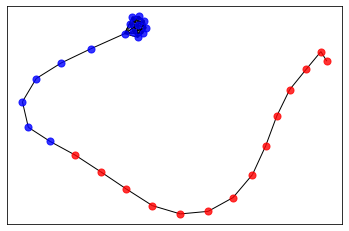

In [33]:
def draw_graph(n, m, shift, num_iter_fix = 100, num_iter_adapt = 100, eps = 1e-10):
    G = nx.lollipop_graph(n, m)
    A = scipy.sparse.csr_matrix(nx.adjacency_matrix(G))
    
    np.random.seed(42)
    x0 = np.random.randn(A.shape[0], 1)
    x, eigvs = partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps)
    pos = [i for i in range(x.shape[0]) if x[i] > 0]
    neg = [i for i in range(x.shape[0]) if x[i] < 0]

    position = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, position, nodelist = pos, node_color = 'r', node_size = 50, alpha = 0.8)
    nx.draw_networkx_nodes(G, position, nodelist = neg, node_color = 'b', node_size = 50, alpha = 0.8)
    nx.draw_networkx_edges(G, position)
    return

draw_graph(n = 10, m = 20, shift = 1e-2)

* (2 pts) Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.

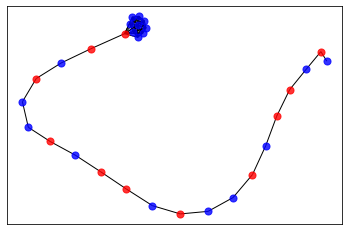

In [35]:
draw_graph(n = 10, m = 20, shift = 1e-2, num_iter_fix = 0)

##### The method converges to the wrong eigenvalue because with setting $num\_iter\_fix = 0$ we only use Rayleigh quotient iteration with dinamic shift, but it converges to eigenpair (eigenvalue and eigenvector) that is closest to the initial guess which we take randomly. To deal with this problem, one may use fixed shift ($num\_iter\_fix \neq 0$) because then we prepare another initial guess and it's better to use it with dynamic shift.

### Spectral graph properties (15 pts)

* (5 pts) Prove that multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.

##### Let us denote $L_i$ - Laplacian matrix for the $i$-th component of the given graph $G$. Assume that graph $G$ has $k \geq 1$ connected components. Then we can represent the general Laplacian matrix of the graph $G$ as:
$L = \begin{pmatrix}
L_1 && 0 && ... && 0 \\
0 && L_2 && ... && 0 \\
... && ... && ... && ... \\
0 && ... && ... && L_k
\end{pmatrix}$
##### The second smallest eigenvalue of $L$ is the algebraic connectivity of $G$ (Fiedler value) and approximates the sparsest cut of a graph (as it was said above). Therefore, for one component of connectivity $L_i$ for any $i$ it can't be zero (otherwise it would mean it is disconnected), and for each block the multiplicity of eigenvalue $\lambda = 0$ is one, so there is one and only one eigenvector coresponding to it. 
##### For matrix $L$ and its eigenvalue $0$ there will be $k$ orthogonal eigenvectors: $h_i = (0, 0, ..., 1, 1, ..., 1, 0, 0, ..., 0)^T$, , each corresponding to $L_i$, where its elements are equal to $1$ for nodes corresponding to $i$-th component of connectivity. Therefore the multiplicity of eigenvalue $0$ is at least $k$.  
  
##### Now let's prove that there can be no more than $k$ orthogonal eigenvectors for $L$ corresponding to eigenvalue $0$.   
#####  Suppose that there is another eigenvector $v$ orthogonal to each $h_i$  $(i = 1...k)$ and consider $Lv = Dv - Av$:
$
(Lv)_i = D_{ii}v_i - \sum\limits_{j:(i,j)\in E} v_j = \sum\limits_{j:(i,j)\in E} (v_i - v_j)
$

$
v^TLv = \sum\limits_i (v_i  \sum\limits_{j:(i,j)\in E} (v_i - v_j)) = \sum\limits_i \sum\limits_{j:(i,j)\in E} v_i(v_i - v_j) =  \sum\limits_i \sum\limits_{i < j:(i,j)\in E} v_i(v_i - v_j) + v_j(v_j - v_i) = \sum\limits_i \sum\limits_{i < j:(i,j)\in E} (v_i - v_j)^2$

##### This expression can be equal to $0$ only if $v$ is constant on every connected component $L_i$. Suppose that $v$ has some non-zero coordinate, then, to be an eigenvector with eigenvalue $0$ it should be nonzero and constant for all nodes within the same connected component $L_i$, i.e. for corresponding coordinates . But then $v$ can not be orthogonal  to $h_i$, so we came to contradiction.

##### So, if we have $k$ blocks, then the algebraic multiplicity of $\lambda = 0$  in the spectrum of the graphs Laplacian $L$ (and also the dimension of the nullspace of the Laplacian) is equal to $k$, i.e. to the number of blocks in $L$, or connected components in $G$.

* (10 pts) The second-smallest eigenvalue of $L(G)$, $\lambda_2(L(G))$, is often called the algebraic connectivity of the
graph $G$. A basic intuition behind the use of this term is that a graph with a higher algebraic
connectivity typically has more edges, and can therefore be thought of as being “more connected”.  
To check this statement, create few graphs with equal number of vertices using `networkx`, one of them should be $C_{30}$ - simple cyclic graph, and one of them should be $K_{30}$ - complete graph. (You also can change the number of vertices if it makes sense for your experiments, but do not make it trivially small).
    * Find the algebraic connectivity for the each graph using inverse iteration.
    * Plot the dependency $\lambda_2(G_i)$ on $|E_i|$.
    * Draw a partition for a chosen graph from the generated set.
    * Comment on the results.

Algebraic connectivity (second eigenvalue):  0.09788696740969283


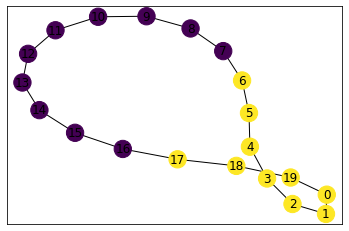

Algebraic connectivity (second eigenvalue):  0.044980772597196336


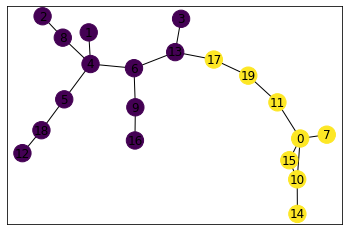

Algebraic connectivity (second eigenvalue):  0.051682025124600885


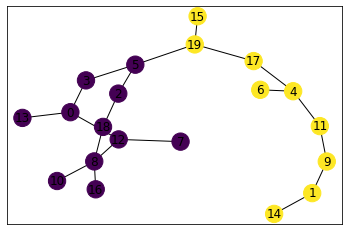

Algebraic connectivity (second eigenvalue):  0.8866531908203085


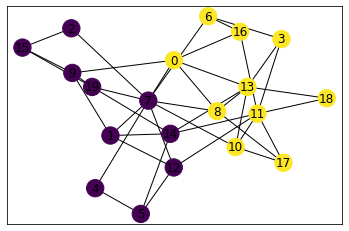

Algebraic connectivity (second eigenvalue):  0.9536728071966156


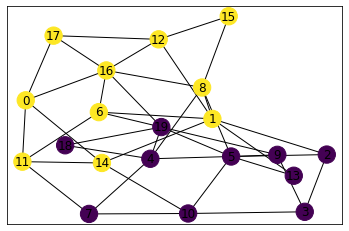

Algebraic connectivity (second eigenvalue):  2.2868526587070908


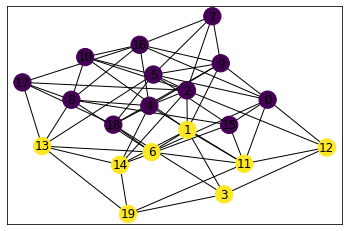

Algebraic connectivity (second eigenvalue):  2.1836626237279897


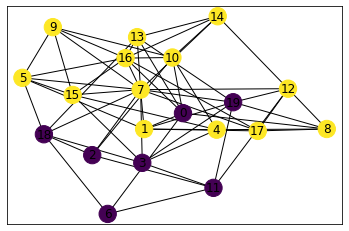

Algebraic connectivity (second eigenvalue):  4.178889677671822


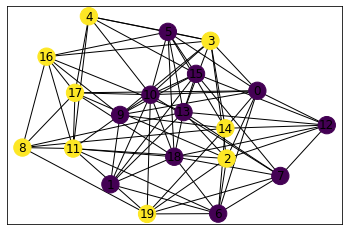

Algebraic connectivity (second eigenvalue):  3.5582933936072707


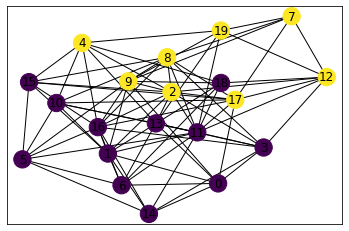

Algebraic connectivity (second eigenvalue):  5.900712021224843


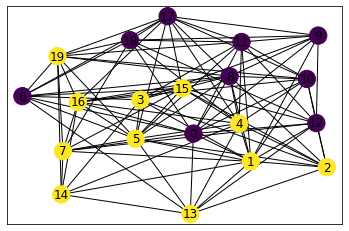

Algebraic connectivity (second eigenvalue):  5.628189656403384


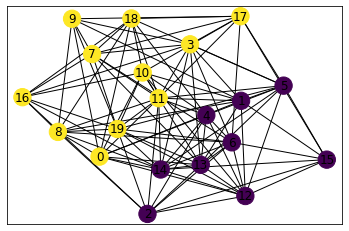

Algebraic connectivity (second eigenvalue):  6.882953751140621


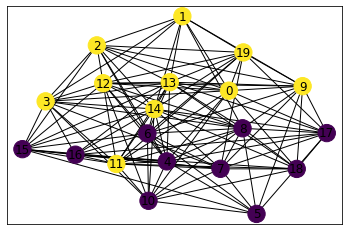

Algebraic connectivity (second eigenvalue):  7.677863549775445


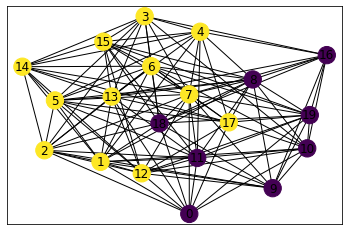

Algebraic connectivity (second eigenvalue):  9.96889219861375


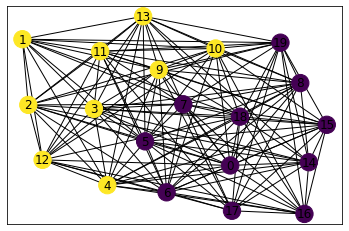

Algebraic connectivity (second eigenvalue):  9.725879755591023


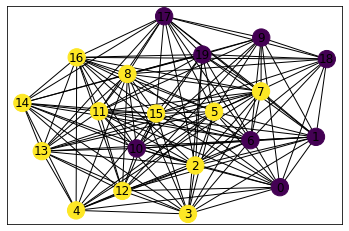

Algebraic connectivity (second eigenvalue):  12.968585694063485


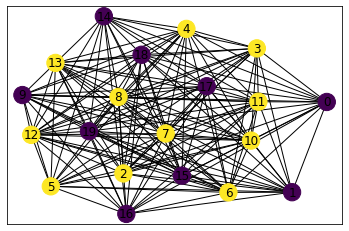

Algebraic connectivity (second eigenvalue):  13.30591670311255


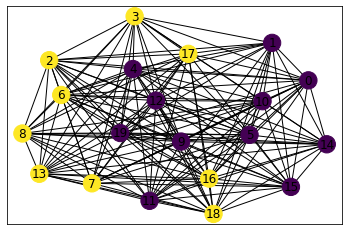

Algebraic connectivity (second eigenvalue):  16.585786437626908


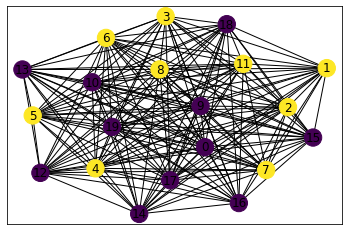

Algebraic connectivity (second eigenvalue):  17.0


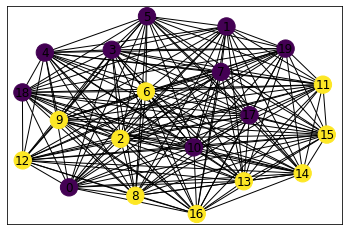

Algebraic connectivity (second eigenvalue):  20.0


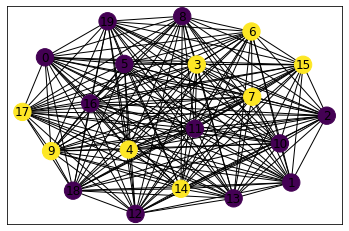

In [51]:
N = 20
C = nx.generators.classic.cycle_graph(N)
graphs = [C]
for k in range(2, N):
    graphs.append(nx.generators.random_graphs.connected_watts_strogatz_graph(N, k, 1))
K = nx.complete_graph(N)
graphs.append(K)
n_edges = [len(G.edges) for G in graphs]

eigvalues = []
for G in graphs:    
    shift = 1e-16
    l2 = 0
    while l2 < 1e-13 or np.isnan(l2):
        A_g = nx.to_scipy_sparse_matrix(G)
        x0 = np.random.randn(A_g.shape[0], 1)
        x, eigs = partition(A_g, shift, 40, 20, x0, 1e-10)
        l2 = eigs[-1]
        shift += 1.5
        
    print('Algebraic connectivity (second eigenvalue): ', l2)
    eigvalues.append(l2)
    
    plt.figure()
    nx.draw_networkx(G, node_color = np.sign(x))
    plt.show()

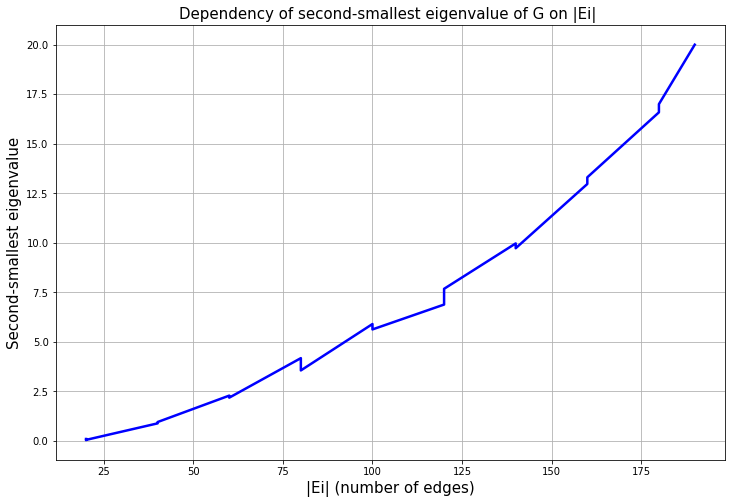

In [52]:
plt.figure(figsize = (12, 8))
plt.plot(n_edges, eigvalues, c = 'b', lw = 2.5)
plt.xlabel('|Ei| (number of edges)', fontsize = 15)
plt.ylabel('Second-smallest eigenvalue', fontsize = 15)
plt.title('Dependency of second-smallest eigenvalue of G on |Ei| ', fontsize = 15)
plt.grid(True)
plt.show()

##### We observed that algebraic connectivity grows with the number of edges. For weakly connected graph (with small number of edges  the partition looks reasonable, but formore strongly connected graphs (for example, fully connected graph $K_{30}$) it becomes more random.

### Image bipartition (10 pts)

Let us deal here with a graph constructed from a binarized image.
Consider the rule, that graph vertices are only pixels with $1$, and each vertex can have no more than $8$ connected vertices (pixel neighbours), $\textit{i.e}$ graph degree is limited by 8.

* (3 pts) Find an image with minimal size equal to $(256, 256)$ and binarize it such that graph built on black pixels has exactly $1$ connected component.

In [26]:
from PIL import Image, ImageDraw
import requests
from scipy.sparse import csr_matrix

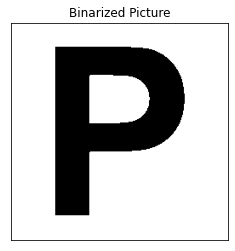

In [521]:
url = 'https://res-3.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/hckquorl7uvdpprxalog'
#url = 'https://miro.medium.com/fit/c/256/256/1*4gcp_wC3hQe2GFImInPXpA.jpeg'
image_raw = Image.open(requests.get(url, stream=True).raw)
image_raw = image_raw.convert('L')
image = np.array(image_raw).astype(np.uint8)
image = (image > 127) * 255.
plt.imshow(Image.fromarray(image))
plt.xticks(())
plt.yticks(())
plt.title('Binarized Picture')
plt.show()

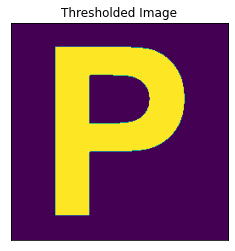

In [54]:
bin_image = (image == 0).astype(np.uint8)
plt.imshow(Image.fromarray(bin_image))
plt.xticks(())
plt.yticks(())
plt.title('Thresholded Image')
plt.show()

In [55]:
np.unique(bin_image, return_counts = True)

(array([0, 1], dtype=uint8), array([48970, 16566]))

* (5 pts) Write a function that constructs sparse adjacency matrix from the binarized image, taking into account the rule from above.

In [56]:
def construct_graph(img):
    N = len(img[img != 0])
    print('Num of vertices: ', N)
    A = csr_matrix((N, N))
    nodes = [0 for _ in range(N)]
    nodes_loc = np.ones_like(img) * (-1)
    n = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] != 0:
                nodes[n] = (i, j)
                nodes_loc[i, j] = n
                n += 1
    neighbours = [(0, 1), (0, -1), (-1, 1), (1, 1), (1, 0), (-1, 0), (-1, -1), (1, -1)]
    for k in range(N):
        for d1, d2 in neighbours:
            l1, l2 = nodes[k]
            n1, n2 = l1 + d1, l2 + d2
            if (n1 >= 0) and (n2 >= 0) and (n1 < img.shape[0]) and (n2 < img.shape[1]):
                if img[n1, n2] != 0:
                    A[k, nodes_loc[l1+ d1, l2 + d2]] = 1
        if k % 10000 == 0:
            print(k)
    return A, nodes, nodes_loc

In [57]:
A, nodes, nodes_loc = construct_graph(bin_image)

Num of vertices:  16566
0


/usr/local/lib/python3.6/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


10000


In [68]:
x0 = np.random.random((A.shape[0], 1))
x, eigs = partition(A, 1e-3, 1500, 1500, x0, 1e-16)

In [69]:
print(eigs[-1])

0.0009762604658758273



* (2 pts) Find the partition of the resulting graph and draw the image in accordance with partition.

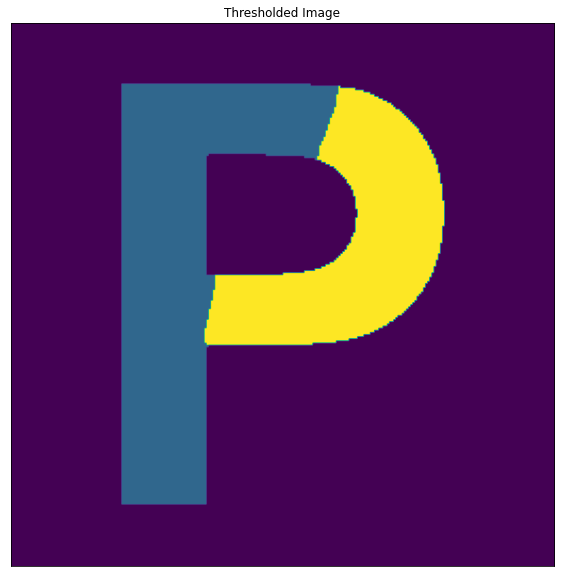

In [70]:
col = ((x > 0).astype(np.uint8) * 30) + 15
N = len(bin_image[bin_image != 0])
for k in range(N):
    l1, l2 = nodes[k]
    bin_image[l1, l2] = col[k]
    
plt.figure(figsize=(10, 10))
plt.imshow(bin_image)
plt.xticks(())
plt.yticks(())
plt.title('Thresholded Image')
plt.show()

## Problem 3 (25 pts)

**Disclaimer**: this problem is released first time, so some typos can be found. 

## Mathematical model (Navier-Stokes equations)

The governing equations for two-dimensional incompressible
flows can be written in a dimensionless form as:

\begin{equation}\tag{1}
\dfrac{\partial \omega}{\partial t} = \dfrac{1}{Re} \big(\dfrac{\partial^2 \omega}{\partial x^2} + \dfrac{\partial^2 \omega}{\partial y^2}\big) - \big(\dfrac{\partial \psi}{\partial y} \dfrac{\partial \omega}{\partial x} - \dfrac{\partial \psi}{\partial x} \dfrac{\partial \omega}{\partial y}\big),
\end{equation}

along with the kinematic relationship between vorticity $\omega(x,y,t)$ and stream function $\psi(x,y,t)$ according to the Poisson equation, which is given as:

\begin{equation}\tag{2}
\dfrac{\partial^2 \psi}{\partial x^2} + \dfrac{\partial^2 \psi}{\partial y^2} = -\omega.
\end{equation}

We consider equations (1) and (2) in the computational domain $\Omega = [0, 2\pi] \times [0, 2\pi]$ and impose the following periodic boundary conditions:

$$\omega(x,0,t) =\omega(x, 2\pi, t), \quad \omega(0,y,t) =\omega(2\pi, y, t), \quad t \geq 0,$$
and the same for $\psi(x,y,t)$.

Note: the Reynolds number, referred to as $Re$, is a fundamental physical constant that in particular determines whether the fluid flow is laminar or turbulent.

## The animation below represents a particular solution of the Navier-Stokes equations (1) and (2) and you will get it in the end of this problem
<img src="vorticity_N1024_Re10000.0_tau0.001.gif" />

# Fourier-Galerkin pseudospectral method

Fourier series expansion based methods are often used for solving problems with periodic boundary conditions. One of the most accurate methods for solving the Navier–Stokes equations in periodic domains is **the pseudospectral method**, which exploits the Fast Fourier Transform (FFT) algorithm. 

Outline: the main idea of spectral methods is to write the solution of a differential equation as a sum of certain "basis functions" (e.g. Fourier series, Chebyshev polynomials etc) and then to choose the coefficients in the sum in order to satisfy the differential equation as well as possible.

Comprehensive survey of such methods can be found in [this book](https://depts.washington.edu/ph506/Boyd.pdf).

### Discrete Fourier Transform

We discretize the domain $[0,L_x]\times[0, L_y]$ by introducing a computation **grid** consisting of $N_x \times N_y$ equally spaced points.

The discrete grid coordinates for $i = 0, 1, \ldots, N_x$ and $j = 0, 1, \ldots, N_y$ are given by:

$$x_i = \frac{i L_x}{N_x}, \quad y_j = \frac{j L_y}{N_y}.$$

Note, that since the domain is periodic $x_0 = x_{N_x}$ and $y_0 = y_{N_y}$.

 Then, any discrete function $u_{i,j} = u(x_i,y_j)$ can be transformed to the Fourier space using the Discrete Fourier Transform (DFT):

$$ \tilde{u}_{m,n} = \sum_{i = 0}^{N_x - 1}\sum_{j = 0}^{N_y - 1} u_{i, j}e^{-
\mathbf{i}(\frac{2\pi m}{L_x}x_i + \frac{2\pi n}{L_y}y_j)},$$

and its inverse transform is:

$$ u_{i,j} = \frac{1}{N_x N_y} \sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\sum_{n = -\frac{N_y}{2}}^{\frac{N_y}{2} - 1} \tilde{u}_{m, n}e^{\mathbf{i}(\frac{2\pi m}{L_x}x_i + \frac{2\pi n}{L_y}y_j)},$$

where $i$ and $j$ represent indices for the physical space (i.e. coordinates in the introduced grid), $m$ and $n$ are indices in the Fourier space (i.e. frequencies). 


We also introduce wavenumbers:

$$k_x = \frac{2\pi m}{L_x}, \quad k_y = \frac{2 \pi n}{L_y}.$$


**Bonus question:** how DFT coefficients $\tilde{u}_{m,n}$ relate to coefficients in the truncated Fourier series of $u(x,y)$?

### Differentiation
In Fourier space we can easily perform differentiation with respect to $x$ and $y$. For example, the
first and the second order derivatives of any function $u$ in discrete
domain becomes:

$$ \left(\dfrac{\partial u}{\partial x}\right)_{i,j} = \frac{1}{N_x N_y}\sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\sum_{n = \frac{N_y}{2}}^{\frac{N_y}{2} - 1} \tilde{u}_{m, n} (\mathbf{i}k_x) e^{\mathbf{i}(k_x x_i + k_y y_j)}, $$

$$ \left(\dfrac{\partial^2 u}{\partial x^2}\right)_{i,j} = \frac{1}{N_x N_y}\sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\sum_{n = -\frac{N_y}{2}}^{\frac{N_y}{2} - 1} \tilde{u}_{m, n} (-k_x^2) e^{\mathbf{i}(k_x x_i + k_y y_j)}, $$

and similarly for the derivatives w.r.t. $y$ 

Assume $L_x = L_y = L = 2\pi$, $N_x = N_y = N$ for simplicity. Then, differentiation $\frac{\partial}{\partial x}$ in the Fourier space can be implemented as follows:

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def dudx(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N
    return u_tilde * (1j * k1d)

 Note, we use ```np.fft.fftfreq(N)``` to determine the order of frequencies for certain ```numpy``` implementation (see the documentation of ```numpy.fft``` module for details).

Consider the following example:

In [56]:
L = 2*np.pi # size of computational domain
d = 7
N = 2**d

In [57]:
# discretize the domain $[0, 2\pi] \times [0, 2\pi]$ with uniform grid

ls = np.linspace(0, L, N, endpoint=False)
xx, yy = np.meshgrid(ls, ls, indexing='xy')

# define simple periodic function
u = np.sin(xx) * np.sin(yy) 

# first, compute du/dx analytically
u_x = np.cos(xx) * np.sin(yy) 

# next, compute du/dx in Fourier space
u_tilde = np.fft.fft2(u)
u_tilde_x = dudx(u_tilde, N)
u_x_fourier = np.fft.ifft2(u_tilde_x)

# check the result
err = np.linalg.norm(u_x - u_x_fourier)
print("error = ", err)

error =  5.437108258986234e-13


- (5 pts) Similarly with the implementation of ```dudx(u_tilde, N)``` given above, your first task is to implement other derivatives arising in the Navier-Stokes equtions (1), (2). Loops are prohibited!

In [58]:
def dudy(u_tilde, N):
    k2d = (np.fft.fftfreq(N) * N).reshape(-1, 1)
    return u_tilde * (1j * k2d)

def d2udx2(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N
    return u_tilde * (-k1d**2)
    
def d2udy2(u_tilde, N):
    k2d = np.fft.fftfreq(N) * N
    return u_tilde * (-k2d**2)

##### Check the correctness of our functions by comparing them to the analytical derivative

In [59]:
u = np.sin(xx) * np.sin(yy) 
u_y = np.sin(xx) * np.cos(yy) 
u_xx = -u
u_yy = -u

# next, compute du/dy and others in Fourier space
u_tilde = np.fft.fft2(u)
u_tilde_y = dudy(u_tilde, N)
u_tilde_xx = d2udx2(u_tilde, N)
u_tilde_yy = d2udy2(u_tilde, N)

u_xx_fourier = np.fft.ifft2(u_tilde_xx)
u_y_fourier = np.fft.ifft2(u_tilde_y)
u_yy_fourier = np.fft.ifft2(u_tilde_yy)

# check the result
err1 = np.linalg.norm(u_y - u_y_fourier)
print("error = ", err1)
err2 = np.linalg.norm(u_xx - u_xx_fourier)
print("error = ", err2)
err3 = np.linalg.norm(u_yy - u_yy_fourier)
print("error = ", err3)

error =  5.732941215084312e-13
error =  2.6877607115046932e-11
error =  2.6877607115046932e-11


### Navier-Stokes equations in the Fourier space

After transforming Eq. (1) and Eq. (2) to the Fourier space, the governing equations become:

\begin{equation}\tag{3}
\frac{\partial \tilde{\omega}_{m,n}}{\partial t} = \frac{1}{Re}[(-k_x^2 - k_y^2)\tilde{\omega}_{m,n}] - \tilde{N},
\end{equation}

\begin{equation}\tag{4}
(-k_x^2 - k_y^2)\tilde{\psi}_{m,n} = -\tilde{\omega}_{m,n},
\end{equation}

where $\tilde{N}$ represents the non-linear term which is computed using 2D convolutions as follows:

$$\tilde{N} = (\mathbf{i}k_y \tilde{\psi}_{m,n}) \circ (\mathbf{i}k_x \tilde{\omega}_{m,n}) - (\mathbf{i}k_x \tilde{\psi}_{m,n}) \circ (\mathbf{i}k_y \tilde{\omega}_{m,n}),$$

i.e. multiplications in physical space become convolutions in the Fourier space.

To clarify where these convolutions come from, consider two discrete functions $u$ and $v$ represented by their DFT (1D for simplicity):

$$ u_{i} = \frac{1}{N_x} \sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1} \tilde{u}_{m}e^{\mathbf{i}\frac{2\pi m}{L_x}x_i},$$

$$ v_{i} = \frac{1}{N_x} \sum_{n = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\tilde{v}_{n}e^{\mathbf{i}\frac{2\pi n}{L_x}x_i}.$$

Then, the direct multiplication results in:
$$ u_{i} v_{i} = \frac{1}{N_x} \sum_{k = -N_x}^{N_x - 2} \frac{1}{N_x}\tilde{w}_{k}e^{\mathbf{i}\frac{2\pi k}{L_x}x_i},$$
where the coefficients $\tilde{\omega}_k$ are computed as follows (check it!):

$$\tilde{w}_{k} = \sum_{m + n = k}\tilde{u}_m\tilde{v}_n.$$


Below we provide a possible implementation of 2D convolution using ```scipy.signal``` module. Note, that *full* convolution introduces higher frequinces that should be truncated in a proper way.

In [60]:
from scipy import signal

def conv2d_scipy(u_tilde, v_tilde, N):
    # np.fft.fftshift is used to align implementation and formulas
    full_conv = signal.convolve(np.fft.fftshift(u_tilde),\
                              np.fft.fftshift(v_tilde), mode='full')
    trunc_conv = full_conv[N//2:-N//2+1, N//2:-N//2+1]
    return np.fft.ifftshift(trunc_conv)/(N*N)

(10 pts) Your second task is to implement the same 2D convolution but using the *Convolution Theorem* in this time.


 
 Hint:  From the lecture course you should know that applying *Convolution Theorem* is straightforward when computing **circular** (or periodic) convolutions. However, for this task you should use an appropriate zero-padding by a factor of two (with further truncation).

In [61]:
def conv2d(u_tilde, v_tilde, N):
    pad = np.zeros((N, N))
    u_tilde = np.fft.fftshift(u_tilde)
    u_tilde = np.vstack((u_tilde, pad))
    padding = np.vstack((pad, pad))
    u_tilde = np.hstack((u_tilde, padding))
    u_trans = np.fft.fft2(u_tilde)
    
    v_tilde = np.fft.fftshift(v_tilde)
    v_tilde = np.vstack((v_tilde, pad))
    v_tilde = np.hstack((v_tilde, padding))
    v_trans = np.fft.fft2(v_tilde)
    
    uv_product = u_trans * v_trans
    res = np.fft.ifft2(uv_product)[N//2: -N//2, N//2 : -N//2]
    res = np.fft.ifftshift(res) / (N**2)
    return res

In [62]:
# check yourself
u_tilde = np.random.rand(N, N)
v_tilde = np.random.rand(N, N)

err = np.linalg.norm(conv2d(u_tilde, v_tilde, N) - conv2d_scipy(u_tilde, v_tilde, N))
print("error =", err) # should be close to machine precision

error = 4.058537007270783e-15


**Poisson solver**

Finally, we need to solve the Poisson equation Eq. (2) which can be easily computed in the Fourier space according to the Eq. (4).


(5 pts) Implement inverse of the laplacian operator according to the template provided below. Note: the laplacian operator with periodic boundary conditions is singular (since the constant function is in nullspace). So, in order to avoid division by zero:
1. Assume the problem is always consistent (i.e. $\tilde{\omega}_{0,0} = 0$), 
2. Assume $\tilde{\psi}_{0,0} = 0$ (i.e. return normal solution). Loops are prohibited!

In [63]:
def freq(x, y):
    return x**2 + y**2

def laplace_inverse(omega_tilde, N):
    omega_tilde[0, 0] = 0
    k = np.fft.fftfreq(N) * 1j * N
    #k[:] -= N/2
    xx_, yy_ = np.meshgrid(k, k, indexing='xy')
    k_matrix = freq(xx_, yy_)
    k_matrix[0, 0] = 1
    psi_tilde = omega_tilde / k_matrix
    psi_tilde[0, 0] = 0
    return psi_tilde

In [64]:
# check yourself
# consider simple solution
sol_analytic = np.sin(xx)*np.sin(yy)

# compute corresponding right hand side analytically
rhs = -2*np.sin(xx)*np.sin(yy)

# solve Poisson problem in Fourier space
rhs_tilde = np.fft.fft2(rhs)
sol_tilde = laplace_inverse(rhs_tilde, N)
sol = np.fft.ifft2(sol_tilde)
# check error is small
err = np.linalg.norm(sol - sol_analytic)
print("error =", err)

error = 1.8562051106140542e-14


**Time integration**

Eqs. (3) and (4) can be considered as semi-discrete ordinary differential equations (ODEs) obtained after (spectral) spatial discretization of the partial differential equations (1) and (2):

\begin{equation}\tag{5}
\frac{d \tilde{\omega}}{dt} = \mathcal{L}(\tilde{\omega}, \tilde{\psi}),
\end{equation}

where $\mathcal{L}( \tilde{\omega} , \tilde{\psi})$ is the discrete operator of spatial derivatives including non-linear convective terms, linear diffusive terms, and $\tilde{\psi}$ which is obtained from the Poisson equation (4).

(5 pts) Implement $\mathcal{L}$ according to the template provided below

In [65]:
def L_op(omega_tilde, psi_tilde, N, Re=1):
    psi_tilde[0, 0] = 1
    k = np.fft.fftfreq(N) * 1j * N
    xx_, yy_ = np.meshgrid(k, k, indexing='xy')
    #k_matrix = 1j * freq(xx_, yy_)
    #k_matrix[0, 0] = 1
    coef = omega_tilde**2 / psi_tilde
    coef = np.nan_to_num(coef, copy=False, nan=1, posinf=1e16, neginf=1e-16)
    
    N_tilde = (conv2d(1j * yy_ * psi_tilde, 1j * xx_ * omega_tilde, N) -
            conv2d(1j * xx_ * psi_tilde, 1j * yy_ * omega_tilde, N))
    #return (1 / Re * (k_matrix * omega_tilde) - N_tilde)
    return (1 / Re * (-coef) - N_tilde)

We integrate in time using fourth-order Runge–Kutta scheme that can be written in the following form:

$$\tilde{\omega}^{(1)} = \tilde{\omega}^{n} + \frac{\Delta t}{2}\mathcal{L}(\tilde{\omega}^{n}, \tilde{\psi}^{n})$$

$$\tilde{\omega}^{(2)} = \tilde{\omega}^{n} + \frac{\Delta t}{2}\mathcal{L}(\tilde{\omega}^{(1)}, \tilde{\psi}^{(1)})$$

$$\tilde{\omega}^{(3)} = \tilde{\omega}^{n} + \Delta t\mathcal{L}(\tilde{\omega}^{(2)}, \tilde{\psi}^{(2)})$$

$$\tilde{\omega}^{n+1} = \frac{1}{3}(-\tilde{\omega}^{n} + \tilde{\omega}^{(1)} + 2\tilde{\omega}^{(2)} + \tilde{\omega}^{(3)}) + \frac{\Delta t}{6}\mathcal{L}(\tilde{\omega}^{3}, \tilde{\psi}^{3})$$



In [66]:
def integrate_runge_kutta(omega0_tilde, N, n_steps, tau, Re):
    omega_prev = omega0_tilde
    psi_prev = laplace_inverse(-omega_prev, N)
    for step in range(n_steps):
        if(step%100 == 0):
            print(step)
        omega_1 = omega_prev + (tau/2)*L_op(omega_prev, psi_prev, N, Re)
        psi_1 = -laplace_inverse(omega_1, N)

        omega_2 = omega_prev + (tau/2)*L_op(omega_1, psi_1, N, Re)
        psi_2 = -laplace_inverse(omega_2, N)

        omega_3 = omega_prev + tau*L_op(omega_2, psi_2, N, Re)
        psi_3 = -laplace_inverse(omega_3, N)

        omega_next = (1./3)*(-omega_prev + omega_1 + 2*omega_2 + omega_3) + (tau/6)*L_op(omega_3, psi_3, N, Re)
        psi_next = -laplace_inverse(omega_next, N)

        omega_prev = omega_next
        psi_prev = psi_next
    return omega_prev

### Validation with analytical solution

We first consider the Taylor-Green vortex (known analytical solution of the Navier-Stokes equations) to validate our solver:

In [67]:
# Taylor-Green vortex -- analytical solution for validation purposes

def taylor_green_vortex(xx, yy, t, N, Re):
    k = 3
    omega = 2*k*np.cos(k*xx)*np.cos(k*yy)*np.exp(-2*k**2*t*(1/Re))
    return omega

In [68]:
Re = 1000
tau = 1e-2 # timestep
n_steps = 100
T = tau * n_steps # finial time

omega0 = taylor_green_vortex(xx, yy, 0, N, Re) # initial vorticity
omega0_tilde = np.fft.fft2(omega0) # convert to the Fourier space
omegaT_tilde = integrate_runge_kutta(omega0_tilde, N, n_steps, tau, Re) # integrate in time in the Fourier space
omegaT = np.real(np.fft.ifft2(omegaT_tilde)) # return back to physical space

0


In [69]:
# check the error is small
omegaT_analytical = taylor_green_vortex(xx, yy, T, N, Re) 
err = np.linalg.norm(omegaT_analytical - omegaT)
print("error =", err)

error = 2.3035634442349044e-12


### Shear layer problem

Finaly, we consider another (more interesting) initial vorticity that gives the dynamic from the GIF in the beginning of this problem.

In [70]:
# intial condition that evolves like a vortex

def shear_layer0(xx, yy, N):
    delta = 0.05
    sigma = 15/np.pi
    a = delta*np.cos(yy[:, :N//2]) - sigma*(np.cosh(sigma*(xx[:, :N//2] - np.pi/2)))**(-2)
    b = delta*np.cos(yy[:, N//2:]) + sigma*(np.cosh(sigma*(3*np.pi/2 - xx[:, N//2:])))**(-2)
    return np.concatenate((a, b), axis=1)

In [71]:
Re = 10000
tau = 1e-3 # timestep
n_steps = 10000
T = tau * n_steps # finial time

omega0 = shear_layer0(xx, yy, N) # initial vorticity
omega0_tilde = np.fft.fft2(omega0) # convert to the Fourier space
omegaT_tilde = integrate_runge_kutta(omega0_tilde, N, n_steps, tau, Re) # integrate in time in the Fourier space
omegaT = np.real(np.fft.ifft2(omegaT_tilde)) # return back to physical space

0


/home/nina/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


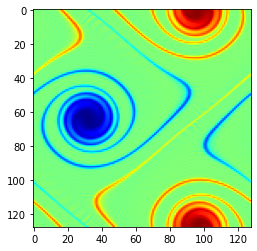

In [72]:
# plot the solution at the final timestamp
plt.imshow(np.real(np.fft.ifft2(omegaT_tilde)), cmap='jet')